In [2]:
# prompt: import necessary basic data analysis libraries

import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
%matplotlib inline


In [3]:
doctor_crm = pd.read_excel('https://github.com/sadathasan4/cdsrtextanalytics/raw/refs/heads/main/Doctor_crm_data.xlsx')

In [4]:
import pandas as pd
import plotly.graph_objects as go

agent_performance = doctor_crm['Agent'].value_counts().reset_index()
agent_performance.columns = ['Agent', 'Number of Calls']

# Creating a 3D pie chart
fig = go.Figure(data=[go.Pie(labels=agent_performance['Agent'],
                               values=agent_performance['Number of Calls'],
                               hole=0.3,  # Adjust hole size for a donut chart effect
                               textinfo='label+percent',
                               marker=dict(colors=px.colors.qualitative.Plotly))])

# Update layout for 3D appearance
fig.update_layout(title='Agent Performance: Number of Calls Handled')

# Show the figure
fig.show()


# **Agents with different brands**

In [5]:
# Count the number of calls for each agent and brand combination
call_counts = doctor_crm.groupby(['Agent', 'Brand']).size().reset_index(name='Number of Calls')

# Create a faceted bar chart with gradients
fig = px.bar(call_counts,
             x='Brand',
             y='Number of Calls',
             color='Number of Calls',  # Use Number of Calls for color gradient
             color_continuous_scale='Oranges',  # Choose a gradient color scale
             facet_col='Agent',
             title='Agent-Brand Relationship: Number of Calls',
             labels={'Number of Calls': 'Number of Calls'},
             text='Number of Calls')

# Customizing the layout
fig.update_layout(
    xaxis_title='Brand',
    yaxis_title='Number of Calls',
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

# Show the figure
fig.show()

In [12]:
import pandas as pd
import plotly.express as px

# Aggregating data to get the number of calls per Brand and Agent
total_calls = doctor_crm.groupby(['Brand', 'Agent']).size().reset_index(name='Number of Calls')

# Create an area chart
fig = px.area(total_calls,
               x='Brand',
               y='Number of Calls',
               color='Agent',  # Ensure 'agent' matches the column name in your DataFrame
               title='Total Calls per Agent and Brand (Area Chart)')

# Customizing the layout
fig.update_layout(
    xaxis_title='Brand',
    yaxis_title='Number of Calls'
)

# Show the figure
fig.show()


In [13]:
# Count the number of calls for each agent and brand combination
call_counts = doctor_crm.groupby(['Agent', 'Brand']).size().reset_index(name='Number of Calls')

# Create a grouped bar chart with a different color scale
fig = px.bar(call_counts,
             x='Brand',
             y='Number of Calls',
             color='Agent',  # Use Agent for coloring to differentiate
             color_discrete_sequence=px.colors.qualitative.Set2,  # Choose a different qualitative color scale
             title='Agent vs. Brand: Number of Calls',
             text='Number of Calls')

# Customizing the layout
fig.update_layout(
    xaxis_title='Brand',
    yaxis_title='Number of Calls',
    barmode='group',  # Group bars by agent
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    xaxis=dict(tickfont=dict(size=10)),  # Reduce x-axis label size
)

# Show the figure
fig.show()


In [14]:
# Pie chart for calls per brand
brand_counts = doctor_crm['Brand'].value_counts()

fig = px.pie(brand_counts,
             values=brand_counts.values,
             names=brand_counts.index,
             title='Distribution of Calls per Brand')

fig.show()





# **caller patient vs call status**

In [15]:
import pandas as pd
import plotly.express as px

# Assuming doctor_crm is already defined

# Summarize the data to get counts
status_counts = doctor_crm.groupby(['Caller Patient', 'Call Status']).size().reset_index(name='Count')

# Create a grouped bar chart
fig = px.bar(status_counts,
             x='Caller Patient',
             y='Count',
             color='Call Status',
             title='Caller Patient vs Call Status',
             text='Count',
             barmode='group')

# Customizing the layout
fig.update_layout(
    xaxis_title='Caller Patient',
    yaxis_title='Number of Calls',
    xaxis_tickangle=-45,
    legend_title_text='Call Status',
    bargap=0.1  # Adjust this value to reduce/increase gap (0 is no gap, 1 is full gap)
)

# Update traces for better readability
fig.update_traces(textposition='outside', width=0.1)

# Optional: Add gridlines
fig.update_layout(yaxis=dict(showgrid=True))

# Show the figure
fig.show()


In [16]:
# Count total calls for each call status
funnel_counts = doctor_crm['Call Status'].value_counts().reset_index()
funnel_counts.columns = ['Call Status', 'Count']

# Create a funnel chart
fig = px.funnel(funnel_counts,
                x='Count',
                y='Call Status',
                title='Funnel Chart of Call Status')

# Show the figure
fig.show()


In [17]:
# Count the number of calls for each Caller Patient and Call Status
status_counts = doctor_crm.groupby(['Caller Patient', 'Call Status']).size().reset_index(name='Count')

# Prepare the data for the radar chart
radar_data = status_counts.pivot(index='Caller Patient', columns='Call Status', values='Count').fillna(0)

# Reset index to create a DataFrame suitable for plotting
radar_data = radar_data.reset_index()

# Create a radar chart for each caller patient
fig = px.line_polar(radar_data.melt(id_vars='Caller Patient'),
                     r='value',  # Values for the call statuses
                     theta='Call Status',  # Call statuses as theta
                     color='Caller Patient',  # Different lines for each caller patient
                     line_close=True,
                     title='Radar Chart of Call Status by Caller Patient')

# Show the figure
fig.show()

# **call status vs agent**

In [18]:


# Count the number of calls for each agent and call status combination
agent_status_counts = doctor_crm.groupby(['Agent', 'Call Status']).size().reset_index(name='Number of Calls')

# Create a grouped bar chart
fig = px.bar(agent_status_counts,
             x='Agent',
             y='Number of Calls',
             color='Call Status',
             title='Agent vs Call Status',
             text='Number of Calls',
             barmode='group',
             color_discrete_sequence=px.colors.qualitative.Set2)  # Use a distinct color palette

# Customizing the layout
fig.update_layout(
    xaxis_title='Agent',
    yaxis_title='Number of Calls',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    plot_bgcolor='rgba(240, 240, 240, 0.8)',  # Light background color
    title_font=dict(size=24, family='Arial, sans-serif', color='black'),  # Title styling
    legend=dict(title='Call Status', orientation='h', x=0, y=1.1)  # Legend styling
)

# Update traces for better text visibility
fig.update_traces(textfont=dict(size=12, color='black'),  # Text font styling
                  marker=dict(line=dict(color='#000000', width=1)))  # Outline of bars

# Show the figure
fig.show()


In [19]:

# Count the number of calls for each agent and call status combination
agent_status_counts = doctor_crm.groupby(['Agent', 'Call Status']).size().reset_index(name='Number of Calls')

# Create a stacked bar chart
fig = px.bar(agent_status_counts,
             x='Agent',
             y='Number of Calls',
             color='Call Status',
             title='Agent vs Call Status',
             text='Number of Calls',
             color_discrete_sequence=px.colors.qualitative.Set2,  # Use a distinct color palette
             barmode='stack')  # Stack the bars

# Customizing the layout
fig.update_layout(
    xaxis_title='Agent',
    yaxis_title='Number of Calls',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    plot_bgcolor='rgba(240, 240, 240, 0.8)',  # Light background color
    title_font=dict(size=24, family='Arial, sans-serif', color='black'),  # Title styling
    legend=dict(title='Call Status', orientation='h', x=0, y=1.1)  # Legend styling
)

# Update traces for better text visibility
fig.update_traces(textfont=dict(size=12, color='black'),  # Text font styling
                  marker=dict(line=dict(color='#000000', width=1)))  # Outline of bars

# Show the figure
fig.show()


# **verbatim column**

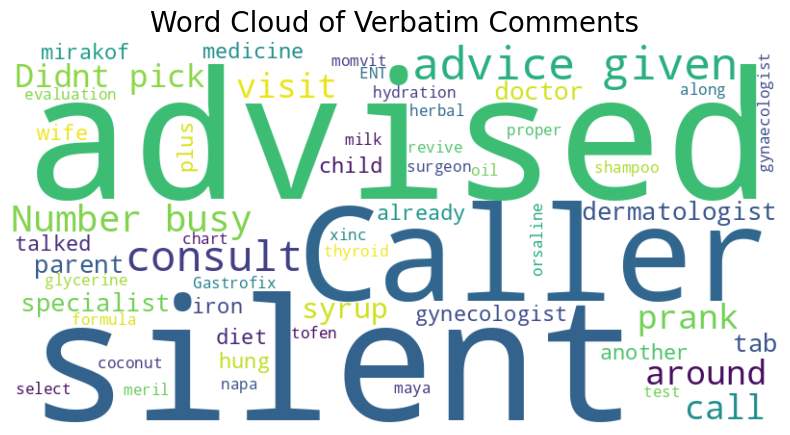

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all comments into a single string
text = ' '.join(doctor_crm['Verbatim'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Verbatim Comments', fontsize=20)
plt.show()


# **call status vs caller patient**

In [21]:

# Count occurrences of Call Status and Caller Patient combinations
heatmap_data = doctor_crm.groupby(['Call Status', 'Caller Patient']).size().unstack(fill_value=0)

# Create a heatmap
fig = px.imshow(heatmap_data,
                labels=dict(x="Caller Patient", y="Call Status", color="Count"),
                title="Heatmap of Call Status vs. Caller Patient",
                color_continuous_scale='YlGnBu')

# Customize layout
fig.update_xaxes(title_text='Caller Patient', tickangle=-45)
fig.update_yaxes(title_text='Call Status')

# Show the figure
fig.show()


In [22]:

# Count occurrences of each Caller Patient per Call Status
facet_counts = doctor_crm.groupby(['Caller Patient', 'Call Status']).size().reset_index(name='Count')

# Create a faceted horizontal bar chart
fig = px.bar(facet_counts,
             x='Count',  # Set x to Count for horizontal bars
             y='Call Status',  # Set y to Call Status
             color='Call Status',
             facet_col='Caller Patient',
             title='Faceted Horizontal Bar Chart of Call Status by Caller Patient',
             barmode='stack',
             orientation='h')  # Set orientation to horizontal

# Customize layout
fig.update_layout(xaxis_title='Count', yaxis_title='Call Status')

# Show the figure
fig.show()
